importing the required packages and libraries.

In [1]:
import os
import xml.etree.ElementTree as ET
import tensorflow as tf
import keras_cv

from tqdm.auto import tqdm
from tensorflow import keras
from keras_cv import bounding_box
from keras_cv import visualization
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.models import Sequential, model_from_json

Using TensorFlow backend


Globale Variable

In [135]:
# Path
gv_path_models = "workspace/models/"
gv_path_images = "workspace/images/original_name/"
gv_annotation_path = "workspace/annotations/original/pascal/"
gv_model_path = "workspace/models/detector.h5"

gv_path_images_v2 = "workspace/Dataset_colin/images"
gv_annotation_path_v2 = "workspace/Dataset_colin/Annotations"

SPLIT_RATIO = 0.2
BATCH_SIZE = 2
LEARNING_RATE = 0.001
EPOCH = 50
GLOBAL_CLIPNORM = 10.0

The Dataset Preparation

In [136]:
class_ids = [
    "Ausbildung_Klasse",
    "Ausbildung_Antrag_gestellt_ja",
    "Ausbildung_Antrag_gestellt_nein",
    "Ausbildung_Amt",
    "Ausbildung_Foerderungsnummer",
    "Ausbilung_Abschluss",
    "Ausbildung_Vollzeit",
    "Ausbildung_Teilzeit",
    "Ausbildung_Staette",
    "Person_Geburtsort",
    "Person_maennlich",
    "Person_Geburtsdatum",
    "Person_weiblich",
    "Person_divers",
    "Person_Name",
    "Person_Familienstand",
    "Person_Vorname",
    "Person_Geburtsname",
    "Person_Familienstand_seit",
    "Person_Stattsangehörigkeit_eigene",
    "Person_Stattsangehörigkeit_Ehegatte",
    "Person_Kinder",
    "Wohnsitz_Strasse",
    "Wohnsitz_Land",
    "Wohnsitz_Postleitzahl",
    "Wohnsitz_Hausnummer",
    "Wohnsitz_Adresszusatz",
    "Wohnsitz_Ort",
    "Wohnsitz_waehrend_Ausbildung_Strasse",
    "Wohnsitz_waehrend_Ausbildung_Hausnummer",
    "Wohnsitz_waehrend_Ausbildung_Land",
    "Wohnsitz_waehrend_Ausbildung_Ort",
    "Wohnsitz_waehrend_Ausbildung_elternwohnung_nein",
    "Wohnsitz_waehrend_Ausbildung_Adresszusatz",
    "Wohnsitz_waehrend_Ausbildung_Postleitzahl",
    "Wohnsitz_waehrend_Ausbildung_elternmiete",
    "Wohnsitz_waehrend_Ausbildung_elternwohnung_ja",
    "Wohnsitz_waehrend_Ausbildung_elternmiete_nein",
    "Ausbildung",
    "Person",
    "Wohnsitz",
    "Wohnsitz_waehrend_Ausbildung",
]
sub_class_ids = [
    "Ausbildung_Klasse",
    "Ausbildung_Antrag_gestellt_ja",
    "Ausbildung_Antrag_gestellt_nein",
    "Ausbildung_Amt",
    "Ausbildung_Foerderungsnummer",
    "Ausbilung_Abschluss",
    "Ausbildung_Vollzeit",
    "Ausbildung_Teilzeit",
    "Ausbildung_Staette",
    "Person_Geburtsort",
    "Person_maennlich",
    "Person_Geburtsdatum",
    "Person_weiblich",
    "Person_divers",
    "Person_Name",
    "Person_Familienstand",
    "Person_Vorname",
    "Person_Geburtsname",
    "Person_Familienstand_seit",
    "Person_Stattsangehörigkeit_eigene",
    "Person_Stattsangehörigkeit_Ehegatte",
    "Person_Kinder",
    "Wohnsitz_Strasse",
    "Wohnsitz_Land",
    "Wohnsitz_Postleitzahl",
    "Wohnsitz_Hausnummer",
    "Wohnsitz_Adresszusatz",
    "Wohnsitz_Ort",
    "Wohnsitz_waehrend_Ausbildung_Strasse",
    "Wohnsitz_waehrend_Ausbildung_Hausnummer",
    "Wohnsitz_waehrend_Ausbildung_Land",
    "Wohnsitz_waehrend_Ausbildung_Ort",
    "Wohnsitz_waehrend_Ausbildung_elternwohnung_nein",
    "Wohnsitz_waehrend_Ausbildung_Adresszusatz",
    "Wohnsitz_waehrend_Ausbildung_Postleitzahl",
    "Wohnsitz_waehrend_Ausbildung_elternmiete",
    "Wohnsitz_waehrend_Ausbildung_elternwohnung_ja",
    "Wohnsitz_waehrend_Ausbildung_elternmiete_nein"

]
main_class_ids = [
    "Ausbildung",
    "Person",
    "Wohnsitz",
    "Wohnsitz_waehrend_Ausbildung"
]
ausbildung_main_class_ids = [
    "Ausbildung_Klasse",
    "Ausbildung_Antrag_gestellt_ja",
    "Ausbildung_Antrag_gestellt_nein",
    "Ausbildung_Amt",
    "Ausbildung_Foerderungsnummer",
    "Ausbilung_Abschluss",
    "Ausbildung_Vollzeit",
    "Ausbildung_Teilzeit",
    "Ausbildung_Staette"
]
person_main_class_ids = [
    "Person_Geburtsort",
    "Person_maennlich",
    "Person_Geburtsdatum",
    "Person_weiblich",
    "Person_divers",
    "Person_Name",
    "Person_Familienstand",
    "Person_Vorname",
    "Person_Geburtsname",
    "Person_Familienstand_seit",
    "Person_Stattsangehörigkeit_eigene",
    "Person_Stattsangehörigkeit_Ehegatte",
    "Person_Kinder"
]
wohnsitz_main_class_ids = [
    "Wohnsitz_Strasse",
    "Wohnsitz_Land",
    "Wohnsitz_Postleitzahl",
    "Wohnsitz_Hausnummer",
    "Wohnsitz_Adresszusatz",
    "Wohnsitz_Ort"
]

wwa_main_class_ids = [
    "Wohnsitz_waehrend_Ausbildung_Strasse",
    "Wohnsitz_waehrend_Ausbildung_Hausnummer",
    "Wohnsitz_waehrend_Ausbildung_Land",
    "Wohnsitz_waehrend_Ausbildung_Ort",
    "Wohnsitz_waehrend_Ausbildung_elternwohnung_nein",
    "Wohnsitz_waehrend_Ausbildung_Adresszusatz",
    "Wohnsitz_waehrend_Ausbildung_Postleitzahl",
    "Wohnsitz_waehrend_Ausbildung_elternmiete",
    "Wohnsitz_waehrend_Ausbildung_elternwohnung_ja",
    "Wohnsitz_waehrend_Ausbildung_elternmiete_nein"
]

class_mapping = dict(zip(range(len(class_ids)), class_ids))
main_class_mapping = dict(zip(range(len(main_class_ids)), main_class_ids))
sub_class_mapping = dict(zip(range(len(sub_class_ids)), sub_class_ids))

ausbildung_main_class_mapping = dict(zip(range(len(ausbildung_main_class_ids)), ausbildung_main_class_ids))
person_main_class_mapping = dict(zip(range(len(person_main_class_ids)), person_main_class_ids))
wohnsitz_main_class_mapping = dict(zip(range(len(wohnsitz_main_class_ids)), wohnsitz_main_class_ids))
wwa_main_class_mapping = dict(zip(range(len(wwa_main_class_ids)), wwa_main_class_ids))

In [137]:
# Get all XML file paths in path_annot and sort them
xml_files = sorted(
    [
        os.path.join(gv_annotation_path_v2, file_name)
        for file_name in os.listdir(gv_annotation_path_v2)
        if file_name.endswith(".xml")
    ]
)

# Get all JPEG image file paths in path_images and sort them
jpg_files = sorted(
    [
        os.path.join(gv_path_images_v2, file_name)
        for file_name in os.listdir(gv_path_images_v2)
        if file_name.endswith(".jpg")
    ]
)

parsing the XML annotation files

In [138]:
def map_class_id(classes, cls):
    class_ids = [
        list(class_mapping.keys())[list(class_mapping.values()).index(cls)]
        for cls in classes
    ]
    return class_ids


def create_box(bbox):
    xmin = float(bbox.find("xmin").text)
    ymin = float(bbox.find("ymin").text)
    xmax = float(bbox.find("xmax").text)
    ymax = float(bbox.find("ymax").text)

    return [xmin, ymin, xmax, ymax]



In [139]:
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_name = root.find("filename").text
    image_path = os.path.join(gv_path_images_v2, image_name)

    boxes = []
    classes = []
    main_classes = []
    sub_classes = []
    main_boxes = []
    sub_boxes = []
    for obj in root.iter("object"):
        cls = obj.find("name").text
        classes.append(cls)
        bbox = obj.find("bndbox")

        boxes.append(create_box(bbox))

        if (cls == 'Person') or (cls == 'Wohnsitz') or (cls == 'Ausbildung') or (cls == 'Wohnsitz_waehrend_Ausbildung'):
            main_classes.append(cls)
            bbox = obj.find("bndbox")
            main_boxes.append(create_box(bbox))
        else:
            bbox = obj.find("bndbox")
            sub_boxes.append(create_box(bbox))
            sub_classes.append(cls)

    class_ids = map_class_id(classes, cls)
    main_class_ids = map_class_id(main_classes, cls)
    sub_class_ids = map_class_id(sub_classes, cls)

    return image_path, boxes, class_ids, main_class_ids, sub_class_ids, main_boxes, sub_boxes


In [140]:
def parse_annotation_seperate(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_name = root.find("filename").text
    image_path = os.path.join(gv_path_images_v2, image_name)

    ausbildung_main_classes = []
    ausbildung_main_boxes = []
    person_main_classes = []
    person_main_boxes = []
    wohnsitz_main_classes = []
    wohnsitz_main_boxes = []
    wwa_main_classes = []
    wwa_main_boxes = []

    for obj in root.iter("object"):
        cls = obj.find("name").text
        bbox = obj.find("bndbox")

        if (cls == 'Ausbildung_Klasse') or (cls == 'Ausbildung_Antrag_gestellt_ja') or (
                cls == 'Ausbildung_Antrag_gestellt_nein') or (cls == 'Ausbildung_Amt') or (
                cls == 'Ausbildung_Foerderungsnummer') or (cls == 'Ausbilung_Abschluss') or (
                cls == 'Ausbildung_Vollzeit') or (cls == 'Ausbildung_Teilzeit') or (cls == 'Ausbildung_Staette'):

            ausbildung_main_classes.append(cls)
            bbox = obj.find("bndbox")
            ausbildung_main_boxes.append(create_box(bbox))

        elif (cls == 'Person_Geburtsort') or (cls == 'Person_maennlich') or (cls == 'Person_Geburtsdatum') or (
                cls == 'Person_weiblich') or (cls == 'Person_divers') or (cls == 'Person_Name') or (
                cls == 'Person_Familienstand') or (cls == 'Person_Vorname') or (cls == 'Person_Geburtsname') or (
                cls == 'Person_Familienstand_seit') or (cls == 'Person_Stattsangehörigkeit_eigene') or (
                cls == 'Person_Stattsangehörigkeit_Ehegatte') or (cls == 'Person_Kinder'):

            person_main_classes.append(cls)
            bbox = obj.find("bndbox")
            person_main_boxes.append(create_box(bbox))

        elif (cls == 'Wohnsitz_Strasse') or (cls == 'Wohnsitz_Land') or (cls == 'Wohnsitz_Postleitzahl') or (
                cls == 'Wohnsitz_Hausnummer') or (cls == 'Wohnsitz_Adresszusatz') or (cls == 'Wohnsitz_Ort'):

            wohnsitz_main_classes.append(cls)
            bbox = obj.find("bndbox")
            wohnsitz_main_boxes.append(create_box(bbox))

        elif (cls == 'Wohnsitz_waehrend_Ausbildung_Strasse') or (cls == 'Wohnsitz_waehrend_Ausbildung_Hausnummer') or (
                cls == 'Wohnsitz_waehrend_Ausbildung_Land') or (
                cls == 'Wohnsitz_waehrend_Ausbildung_Ort') or (
                cls == 'Wohnsitz_waehrend_Ausbildung_elternwohnung_nein') or (
                cls == 'Wohnsitz_waehrend_Ausbildung_Adresszusatz') or (
                cls == 'Wohnsitz_waehrend_Ausbildung_Postleitzahl') or (
                cls == 'Wohnsitz_waehrend_Ausbildung_elternmiete') or (
                cls == 'Wohnsitz_waehrend_Ausbildung_elternwohnung_ja') or (
                cls == 'Wohnsitz_waehrend_Ausbildung_elternmiete_nein'):

            wwa_main_classes.append(cls)
            bbox = obj.find("bndbox")
            wwa_main_boxes.append(create_box(bbox))

    ausbildung_main_class_ids = map_class_id(ausbildung_main_classes, cls)
    person_main_class_ids = map_class_id(person_main_classes, cls)
    wohnsitz_main_class_ids = map_class_id(wohnsitz_main_classes, cls)
    wwa_main_class_ids = map_class_id(wwa_main_classes, cls)

    return image_path, ausbildung_main_class_ids, ausbildung_main_boxes, person_main_class_ids, person_main_boxes, wohnsitz_main_class_ids, wohnsitz_main_boxes, wwa_main_class_ids, wwa_main_boxes

In [141]:
image_paths = []
bbox = []
classes = []
main_classes = []
sub_classes = []
main_bbox = []
sub_bbox = []
for xml_file in tqdm(xml_files):
    image_path, boxes, class_ids, main_class_ids, sub_class_ids, main_boxes, sub_boxes = parse_annotation(xml_file)
    image_paths.append(image_path)
    bbox.append(boxes)
    classes.append(class_ids)

    main_classes.append(main_class_ids)
    sub_classes.append(sub_class_ids)
    main_bbox.append(main_boxes)
    sub_bbox.append(sub_boxes)

  0%|          | 0/18 [00:00<?, ?it/s]

In [142]:
image_paths = []
ausbildung_ms_classes = []
ausbildung_ms_boxes = []
person_ms_classes = []
person_ms_boxes = []
wohnsitz_ms_classes = []
wohnsitz_ms_boxes = []
wwa_ms_classes = []
wwa_ms_boxes = []

for xml_file in tqdm(xml_files):
    image_path, ausbildung_main_class_ids, ausbildung_main_boxes, person_main_class_ids, person_main_boxes, wohnsitz_main_class_ids, wohnsitz_main_boxes, wwa_main_class_ids, wwa_main_boxes = parse_annotation_seperate(
        xml_file)

    image_paths.append(image_path)
    ausbildung_ms_classes.append(ausbildung_main_class_ids)
    ausbildung_ms_boxes.append(ausbildung_main_boxes)
    person_ms_classes.append(person_main_class_ids)
    person_ms_boxes.append(person_main_boxes)
    wohnsitz_ms_classes.append(wohnsitz_main_class_ids)
    wohnsitz_ms_boxes.append(wohnsitz_main_boxes)
    wwa_ms_classes.append(wwa_main_class_ids)
    wwa_ms_boxes.append(wwa_main_boxes)


  0%|          | 0/18 [00:00<?, ?it/s]

In [143]:
def forming_main_class_labels(array):
    for i in range(len(array)):
        for j in range(len(array[i])):
            if array[i][j] == 38:
                array[i][j] = 0
            if array[i][j] == 39:
                array[i][j] = 1
            if array[i][j] == 40:
                array[i][j] = 2
            if array[i][j] == 41:
                array[i][j] = 3
    return array


In [144]:
def forming_main_class_person_labels(array):
    for i in range(len(array)):
        for j in range(len(array[i])):
            if array[i][j] == 9:
                array[i][j] = 0
            if array[i][j] == 10:
                array[i][j] = 1
            if array[i][j] == 11:
                array[i][j] = 2
            if array[i][j] == 12:
                array[i][j] = 3
            if array[i][j] == 13:
                array[i][j] = 4
            if array[i][j] == 14:
                array[i][j] = 5
            if array[i][j] == 15:
                array[i][j] = 6
            if array[i][j] == 16:
                array[i][j] = 7
            if array[i][j] == 17:
                array[i][j] = 8
            if array[i][j] == 18:
                array[i][j] = 9
            if array[i][j] == 19:
                array[i][j] = 10
            if array[i][j] == 20:
                array[i][j] = 11
            if array[i][j] == 21:
                array[i][j] = 12
    return array


In [145]:
def forming_main_class_wohnsitz_labels(array):
    for i in range(len(array)):
        for j in range(len(array[i])):
            if array[i][j] == 22:
                array[i][j] = 0
            if array[i][j] == 23:
                array[i][j] = 1
            if array[i][j] == 24:
                array[i][j] = 2
            if array[i][j] == 25:
                array[i][j] = 3
            if array[i][j] == 26:
                array[i][j] = 4
            if array[i][j] == 27:
                array[i][j] = 5
    return array

In [146]:
def forming_main_class_wwa_labels(array):
    for i in range(len(array)):
        for j in range(len(array[i])):
            if array[i][j] == 28:
                array[i][j] = 0
            if array[i][j] == 29:
                array[i][j] = 1
            if array[i][j] == 30:
                array[i][j] = 2
            if array[i][j] == 31:
                array[i][j] = 3
            if array[i][j] == 32:
                array[i][j] = 4
            if array[i][j] == 33:
                array[i][j] = 5
            if array[i][j] == 34:
                array[i][j] = 6
            if array[i][j] == 35:
                array[i][j] = 7
            if array[i][j] == 36:
                array[i][j] = 8
            if array[i][j] == 37:
                array[i][j] = 9
    return array

In [147]:
main_classes = forming_main_class_labels(main_classes)
person_ms_classes = forming_main_class_person_labels(person_ms_classes)
wohnsitz_ms_classes = forming_main_class_wohnsitz_labels(wohnsitz_ms_classes)
wwa_ms_classes = forming_main_class_wwa_labels(wwa_ms_classes)

In [121]:
print(wwa_ms_classes)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]


In [170]:
def create_data_tensor(image_paths, classes, bbox):
    bbox = tf.ragged.constant(bbox)
    classes = tf.ragged.constant(classes)
    image_paths = tf.ragged.constant(image_paths)
    data = tf.data.Dataset.from_tensor_slices((image_paths, classes, bbox))
    return data

In [171]:
data = create_data_tensor(image_paths, classes, bbox)
main_data = create_data_tensor(image_paths, main_classes, main_bbox)
sub_data = create_data_tensor(image_paths, sub_classes, sub_bbox)

ausbildung_ms_data = create_data_tensor(image_paths, ausbildung_ms_classes, ausbildung_ms_boxes)
person_ms_data  = create_data_tensor(image_paths, person_ms_classes, person_ms_boxes)
wohnsitz_ms_data  = create_data_tensor(image_paths, wohnsitz_ms_classes, wohnsitz_ms_boxes)
wwa_ms_data  = create_data_tensor(image_paths, wwa_ms_classes, wwa_ms_boxes)

In [172]:
def create_train_test_data(split, data_tensor):
    num_val = int(split * SPLIT_RATIO)  #int(len(image_path_list)
    val_data = data_tensor.take(num_val)
    train_data = data_tensor.skip(num_val)
    return val_data, train_data

In [173]:
val_data, train_data = create_train_test_data(int(len(xml_files)), data)
main_val_data, main_train_data = create_train_test_data(int(len(xml_files)), main_data)
sub_val_data, sub_train_data = create_train_test_data(int(len(xml_files)), sub_data)

ausbildung_val_data, ausbildung_train_data = create_train_test_data(int(len(xml_files)), ausbildung_ms_data)
person_val_data, person_train_data = create_train_test_data(int(len(xml_files)), person_ms_data)
wohnsitz_val_data, wohnsitz_train_data = create_train_test_data(int(len(xml_files)), wohnsitz_ms_data)
wwa_val_data, wwa_train_data = create_train_test_data(int(len(xml_files)), wwa_ms_data)

In [183]:
YOLO_HEIGHT = 640*2
YOLO_WIDTH = 640

In [184]:
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image


def load_dataset(image_path, classes, bbox):
    # Read Image
    image = load_image(image_path)
    bounding_boxes = {
        "classes": tf.cast(classes, dtype=tf.float32),
        "boxes": bbox,
    }
    return {"images": tf.cast(image, tf.float32), "bounding_boxes": bounding_boxes}

In [200]:
augmenter = keras.Sequential(
    layers=[
        keras_cv.layers.JitteredResize(
            target_size=(YOLO_HEIGHT, YOLO_WIDTH),
            scale_factor=(1.0, 1.0),
            interpolation="nearest",
            bounding_box_format="xyxy",
        ),

    ]
)

In [77]:
# augmenter = tf.keras.Sequential(
#     layers=[
#         # keras_cv.layers.GridMask(
#         #     ratio_factor=(0, 0.5),
#         #     rotation_factor=0.15,
#         #     fill_mode="constant",
#         #     fill_value=0.0,
#         #     seed=None
#         # ),
#         # keras_cv.layers.AutoContrast([0, 255]),
#         # keras_cv.layers.RandomBrightness(factor=0.25,
#         #                                  value_range=(0., 255.)),
#         # keras_cv.layers.MixUp(alpha=0.2, seed=None),
#         keras_cv.layers.JitteredResize(
#             target_size=(YOLO_HEIGHT, YOLO_WIDTH),
#             scale_factor=(1.0, 1.0),
#             bounding_box_format="xyxy",
#             interpolation="bicubic"
#         ),
#     ],
#     name="Augment_Layer"
# )

In [201]:
resizing = keras_cv.layers.JitteredResize(
    target_size=(YOLO_HEIGHT, YOLO_WIDTH),
    scale_factor=(1.0, 1.0),
    bounding_box_format="xyxy",
    interpolation="bicubic"
)



In [195]:
def create_train_ds(train_data):
    train_ds = train_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
    train_ds = train_ds.shuffle(BATCH_SIZE * 8)
    train_ds = train_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
    train_ds = train_ds.map(augmenter, num_parallel_calls=tf.data.AUTOTUNE)
    # train_ds = train_ds.map(resizing, num_parallel_calls=tf.data.AUTOTUNE)
    return train_ds

In [202]:
train_ds = create_train_ds(train_data)
main_train_ds = create_train_ds(main_train_data)
sub_train_ds = create_train_ds(sub_train_data)

ausbildung_train_ds = create_train_ds(ausbildung_train_data)
person_train_ds = create_train_ds(person_train_data)
wohnsitz_train_ds = create_train_ds(wohnsitz_train_data)
wwa_train_ds = create_train_ds(wwa_train_data)

In [203]:
def create_val_ds(val_data):
    val_ds = val_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
    val_ds = val_ds.shuffle(BATCH_SIZE * 8)
    val_ds = val_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
    # val_ds = val_ds.map(resizing, num_parallel_calls=tf.data.AUTOTUNE)
    return val_ds

In [204]:
val_ds = create_train_ds(val_data)
main_val_ds = create_train_ds(main_val_data)
sub_val_ds = create_train_ds(sub_val_data)

ausbildung_val_ds = create_train_ds(ausbildung_val_data)
person_val_ds = create_train_ds(person_val_data)
wohnsitz_val_ds = create_train_ds(wohnsitz_val_data)
wwa_val_ds = create_train_ds(wwa_val_data)

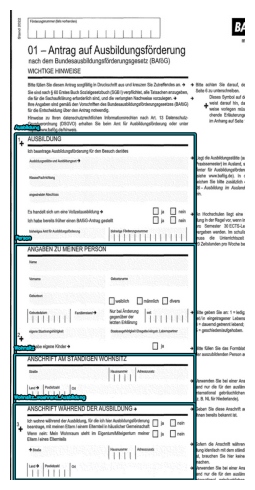

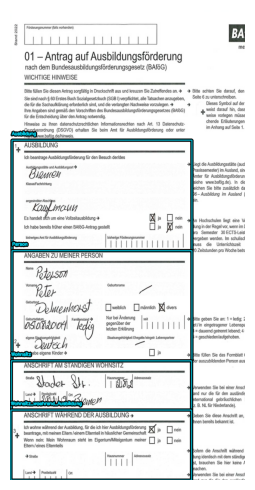

In [205]:
def visualize_dataset(inputs, value_range, rows, cols, bounding_box_format):
    inputs = next(iter(inputs.take(1)))
    images, bounding_boxes = inputs["images"], inputs["bounding_boxes"]

    keras_cv.visualization.plot_bounding_box_gallery(
        images,
        value_range=value_range,
        rows=rows,
        cols=cols,
        y_true=bounding_boxes,
        scale=5,
        font_scale=0.4,
        bounding_box_format=bounding_box_format,
        class_mapping=main_class_mapping,
    )


visualize_dataset(
    main_train_ds, bounding_box_format="xyxy", value_range=(0, 255), rows=1, cols=1
)

visualize_dataset(
    main_val_ds, bounding_box_format="xyxy", value_range=(0, 255), rows=1, cols=1
)

In [206]:
def dict_to_tuple(inputs):
    return inputs["images"], inputs["bounding_boxes"]


train_ds = train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

val_ds = val_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

main_train_ds = main_train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
main_train_ds = main_train_ds.prefetch(tf.data.AUTOTUNE)

main_val_ds = main_val_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
main_val_ds = main_val_ds.prefetch(tf.data.AUTOTUNE)

sub_train_ds = sub_train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
sub_train_ds = sub_train_ds.prefetch(tf.data.AUTOTUNE)

sub_val_ds = sub_val_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
sub_val_ds = sub_val_ds.prefetch(tf.data.AUTOTUNE)

ausbildung_val_ds = ausbildung_val_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
ausbildung_val_ds = ausbildung_val_ds.prefetch(tf.data.AUTOTUNE)

ausbildung_train_ds = ausbildung_train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
ausbildung_train_ds = ausbildung_train_ds.prefetch(tf.data.AUTOTUNE)

person_val_ds = person_val_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
person_val_ds = person_val_ds.prefetch(tf.data.AUTOTUNE)

person_train_ds = person_train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
person_train_ds = person_train_ds.prefetch(tf.data.AUTOTUNE)

wohnsitz_val_ds = wohnsitz_val_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
wohnsitz_val_ds = wohnsitz_val_ds.prefetch(tf.data.AUTOTUNE)

wohnsitz_train_ds = wohnsitz_train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
wohnsitz_train_ds = wohnsitz_train_ds.prefetch(tf.data.AUTOTUNE)

wwa_val_ds = wwa_val_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
wwa_val_ds = wwa_val_ds.prefetch(tf.data.AUTOTUNE)

wwa_train_ds = wwa_train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
wwa_train_ds = train_ds.prefetch(tf.data.AUTOTUNE)



define backbone

In [207]:
def define_backbone(backbone):
    backbone = keras_cv.models.YOLOV8Backbone.from_preset(
        "yolo_v8_xs_backbone_coco",
        load_weights=True
    )
    return backbone

define optimizer

In [208]:
def define_optimizer():
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=LEARNING_RATE,
        global_clipnorm=GLOBAL_CLIPNORM,  #This ensures that gradients, which influence the model’s parameter updates, 
        # don’t become exceedingly large and destabilize training.
    )
    return optimizer

define YOLO8Detector

In [209]:
def define_model(num_classes):
    model = keras_cv.models.YOLOV8Detector(
        num_classes=num_classes,  #the number of object classes
        bounding_box_format="xyxy",
        backbone=define_backbone("yolo_v8_xs_backbone_coco"),
        fpn_depth=1,
    )
    return model

compile model

In [210]:
def compile_model(model):
    model.compile(
        optimizer=define_optimizer(),
        classification_loss="binary_crossentropy",
        #calculates the discrepancy between anticipated class probabilities and actual class probabilities
        box_loss="ciou"  # box_loss -> measure the difference between the predicted bounding boxes and the ground truth
        # he Complete IoU (CIoU) metric is used, which not only measures the overlap between predicted and ground truth bounding 
        # boxes but also considers the difference in aspect ratio, center distance, and box size
    )

fit model

In [211]:
def fit_model(model, train_data, validation_data, epoche):
    history = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=epoche
        #callbacks=[EvaluateCOCOMetricsCallback(val_ds, "workspace/models/yolo_coco_model.h5")],
    )
    return history

define NonMaxSuppression

In [320]:
def define_NonMaxSuppression(model):
    model.prediction_decoder = keras_cv.layers.NonMaxSuppression(
        bounding_box_format="xyxy",
        from_logits=True,
        iou_threshold=0.2,
        confidence_threshold=0.51

    )

define a base model, compile the base model and then loads the weights from a path

In [29]:
def load_weight_model(model_path, num_classe):
    base_model = define_model(num_classe)
    compile_model(base_model)
    loaded_model = base_model.load_weights(model_path)
    return loaded_model


save weights of a model

In [30]:
def save_weights(model, name):
    save_model_path = gv_path_models + name
    model.save_weights(save_model_path)

define visualization methode

In [275]:
def visualize_detections(model, dataset, bounding_box_format, class_mapping):
    images, y_true = next(iter(dataset.take(1)))
    y_pred = model.predict(images)
    y_pred = bounding_box.to_ragged(y_pred)
    print(y_pred)
    visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=bounding_box_format,
        y_true=y_true,
        y_pred=y_pred,
        scale=8,
        rows=1,
        cols=1,
        show=True,
        font_scale=0.5,
        class_mapping=class_mapping,  #class_mapping,
    )

In [216]:
import matplotlib.pyplot as plt

In [234]:
def plot_history_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()

In [235]:
def plot_history_loss_box(history):
    plt.plot(history.history['box_loss'])
    plt.plot(history.history['val_box_loss'])
    plt.title('Model Box loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['box_loss', 'val_box_loss'], loc='upper left')
    plt.show()

In [236]:
def plot_history_loss_class(history):
    plt.plot(history.history['class_loss'])
    plt.plot(history.history['val_class_loss'])
    plt.title('Model Class loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['box_loss', 'val_box_loss'], loc='upper left')
    plt.show()

define and compile model for sub_bbox

In [231]:
yolo_coco= define_model(len(class_mapping))
compile_model(yolo_coco)

define and compile model for main_bbox

In [232]:
all_boxes_history = fit_model(yolo_coco, train_ds, val_ds, 50)

Epoch 1/50
7/7 [==============================] - 86s 4s/step - loss: 84.3341 - box_loss: 4.0992 - class_loss: 80.2349 - val_loss: 73.2712 - val_box_loss: 5.0381 - val_class_loss: 68.2332
Epoch 2/50
7/7 [==============================] - 17s 3s/step - loss: 52.1667 - box_loss: 2.7813 - class_loss: 49.3854 - val_loss: 72.2104 - val_box_loss: 4.8966 - val_class_loss: 67.3138
Epoch 3/50
7/7 [==============================] - 16s 2s/step - loss: 40.6313 - box_loss: 2.2323 - class_loss: 38.3990 - val_loss: 67.1285 - val_box_loss: 4.6287 - val_class_loss: 62.4998
Epoch 4/50
7/7 [==============================] - 17s 2s/step - loss: 34.5123 - box_loss: 1.9812 - class_loss: 32.5311 - val_loss: 62.7193 - val_box_loss: 4.3970 - val_class_loss: 58.3223
Epoch 5/50
7/7 [==============================] - 21s 3s/step - loss: 30.0481 - box_loss: 1.8207 - class_loss: 28.2273 - val_loss: 45.0127 - val_box_loss: 3.5313 - val_class_loss: 41.4814
Epoch 6/50
7/7 [==============================] - 23s 3s/ste

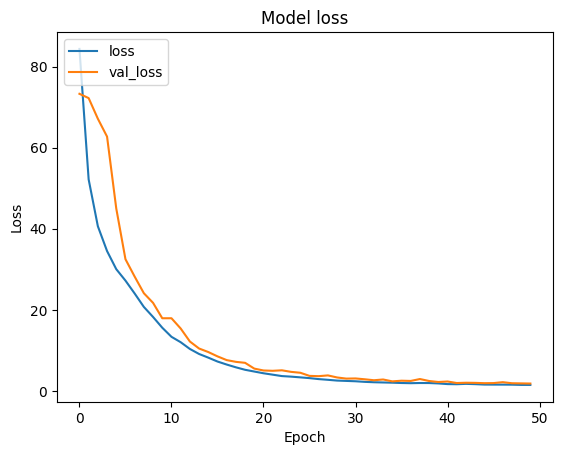

In [240]:
plot_history_loss(all_boxes_history)

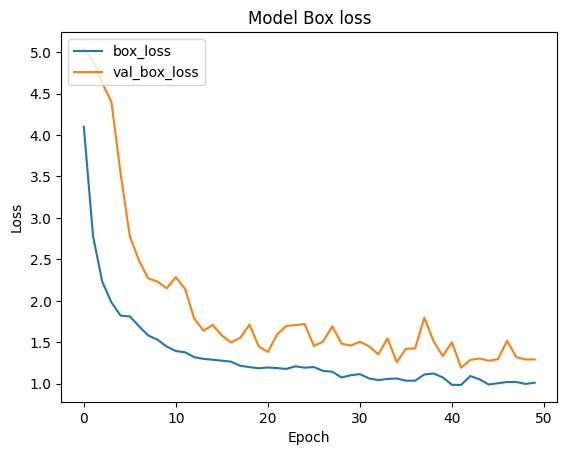

In [241]:
plot_history_loss_box(all_boxes_history)

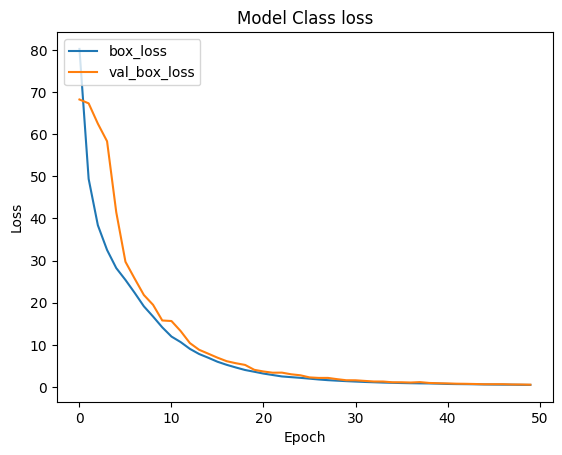

In [242]:
plot_history_loss_class(all_boxes_history)

1/1 [==============================] - 7s 7s/step
{'boxes': <tf.RaggedTensor [[[-0.62532043, 334.59158, 481.73315, 632.87805],
  [12.129471, 635.46436, 494.29477, 933.31274]],

 [[-12.381989, 306.9079, 446.11707, 606.1476],
  [18.353088, 601.6935, 458.1646, 901.49786]]]>, 'confidence': <tf.RaggedTensor [[0.6739201, 0.62837297],
 [0.6690547, 0.53801364]]>, 'classes': <tf.RaggedTensor [[38.0, 39.0],
 [38.0, 39.0]]>, 'num_detections': array([2, 2])}


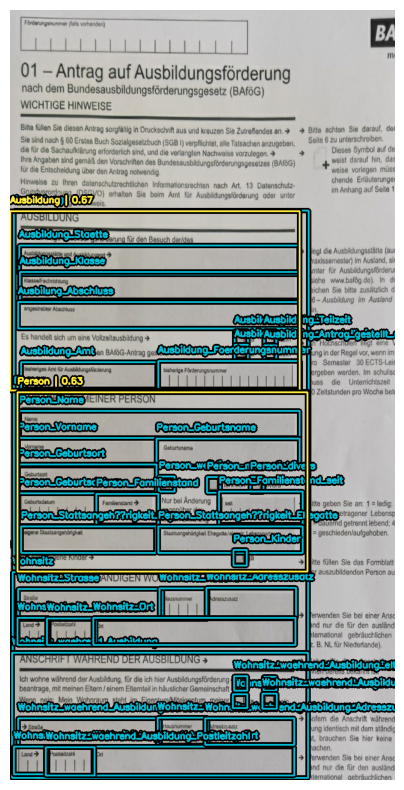

In [278]:
define_NonMaxSuppression(yolo_coco)
visualize_detections(yolo_coco, dataset=val_ds, bounding_box_format="xyxy", class_mapping=class_mapping)

In [261]:
yolo_coco_sub= define_model(len(sub_class_mapping))
compile_model(yolo_coco_sub)

In [262]:
sub_boxes_history = fit_model(yolo_coco_sub, sub_train_ds, sub_val_ds, 50)

Epoch 1/50
7/7 [==============================] - 66s 3s/step - loss: 97.4187 - box_loss: 4.8526 - class_loss: 92.5661 - val_loss: 90.9673 - val_box_loss: 5.3133 - val_class_loss: 85.6540
Epoch 2/50
7/7 [==============================] - 17s 2s/step - loss: 63.1098 - box_loss: 3.1023 - class_loss: 60.0076 - val_loss: 94.9241 - val_box_loss: 5.2422 - val_class_loss: 89.6819
Epoch 3/50
7/7 [==============================] - 22s 3s/step - loss: 48.0964 - box_loss: 2.3770 - class_loss: 45.7194 - val_loss: 82.8199 - val_box_loss: 5.0707 - val_class_loss: 77.7492
Epoch 4/50
7/7 [==============================] - 22s 3s/step - loss: 40.0117 - box_loss: 1.9533 - class_loss: 38.0584 - val_loss: 71.0538 - val_box_loss: 4.5764 - val_class_loss: 66.4773
Epoch 5/50
7/7 [==============================] - 23s 3s/step - loss: 34.5889 - box_loss: 1.7996 - class_loss: 32.7893 - val_loss: 57.5492 - val_box_loss: 4.3713 - val_class_loss: 53.1779
Epoch 6/50
7/7 [==============================] - 25s 3s/ste

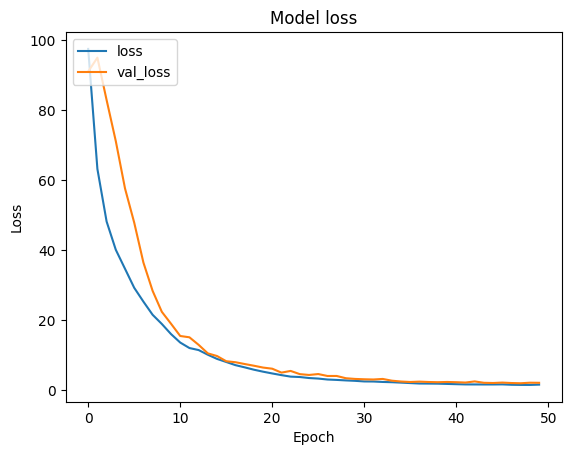

In [263]:
plot_history_loss(sub_boxes_history)

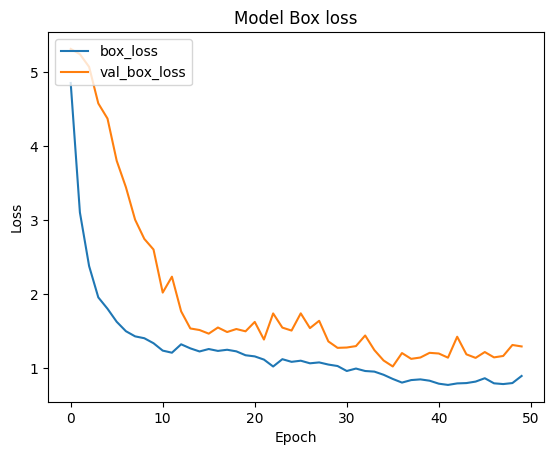

In [264]:
plot_history_loss_box(sub_boxes_history)

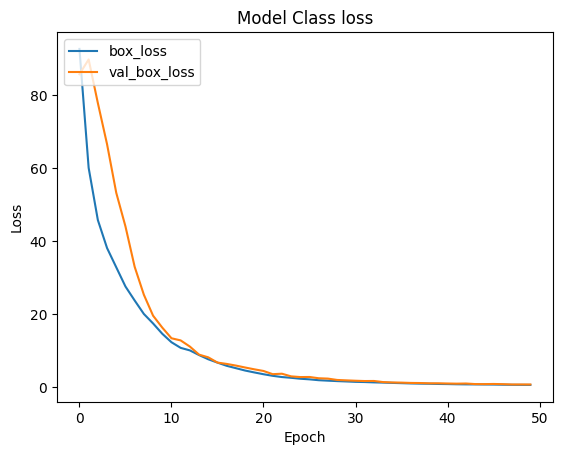

In [265]:
plot_history_loss_class(sub_boxes_history)

1/1 [==============================] - 7s 7s/step
{'boxes': <tf.RaggedTensor [[[29.049316, 434.1946, 466.5428, 478.74072],
  [40.825195, 341.6509, 460.78162, 385.44186],
  [14.319641, 388.4847, 461.83777, 434.42416],
  [43.799103, 615.48706, 481.05853, 661.92255],
  [135.12767, 1174.3632, 473.57883, 1222.6772],
  [145.77773, 963.7236, 470.42877, 1008.056],
  [117.492615, 541.3981, 528.57184, 586.53015],
  [341.39328, 750.84937, 480.9628, 807.4169],
  [417.9431, 486.69797, 437.76263, 510.02423],
  [-24.0999, 1221.5101, 288.83847, 1267.8174],
  [367.2906, 486.3024, 388.56522, 509.87158],
  [417.55576, 1061.2717, 438.31763, 1084.9257],
  [366.6197, 1060.1655, 387.33267, 1084.5134],
  [366.0408, 1090.8804, 388.7582, 1113.9836],
  [142.79288, 667.45435, 520.553, 712.23956],
  [367.12756, 507.894, 388.04733, 535.2082],
  [7.2562637, 749.82874, 144.24345, 805.5291],
  [364.58105, 850.7681, 386.26608, 876.70825],
  [417.39285, 510.95337, 438.4043, 535.20667],
  [414.65305, 1089.748, 437.95285,

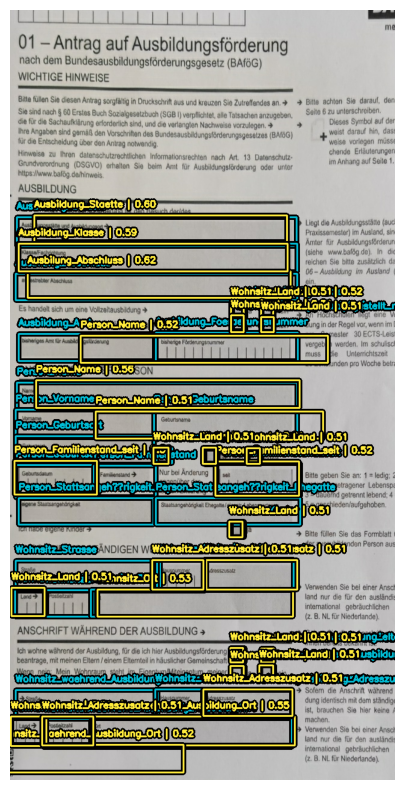

In [322]:
define_NonMaxSuppression(yolo_coco_sub)
visualize_detections(yolo_coco_sub, dataset=sub_val_ds, bounding_box_format="xyxy", class_mapping=sub_class_mapping)

In [292]:
def define_NonMaxSuppression(model):
    model.prediction_decoder = keras_cv.layers.NonMaxSuppression(
        bounding_box_format="xyxy",
        from_logits=True,
        iou_threshold=0.3,
        confidence_threshold=0.52

    )

In [279]:
yolo_coco_main= define_model(len(main_class_mapping))
compile_model(yolo_coco_main)

In [280]:
main_boxes_history = fit_model(yolo_coco_main, main_train_ds, main_val_ds, 50)

Epoch 1/50
7/7 [==============================] - 90s 3s/step - loss: 332.8617 - box_loss: 2.7649 - class_loss: 330.0968 - val_loss: 332.1525 - val_box_loss: 3.7444 - val_class_loss: 328.4081
Epoch 2/50
7/7 [==============================] - 15s 2s/step - loss: 186.8461 - box_loss: 1.4870 - class_loss: 185.3591 - val_loss: 312.8547 - val_box_loss: 3.3955 - val_class_loss: 309.4592
Epoch 3/50
7/7 [==============================] - 15s 2s/step - loss: 140.3027 - box_loss: 1.0698 - class_loss: 139.2329 - val_loss: 250.7826 - val_box_loss: 3.4507 - val_class_loss: 247.3319
Epoch 4/50
7/7 [==============================] - 16s 2s/step - loss: 128.8073 - box_loss: 1.0016 - class_loss: 127.8056 - val_loss: 214.9939 - val_box_loss: 2.9092 - val_class_loss: 212.0848
Epoch 5/50
7/7 [==============================] - 15s 2s/step - loss: 118.7454 - box_loss: 1.0260 - class_loss: 117.7194 - val_loss: 193.3367 - val_box_loss: 3.1117 - val_class_loss: 190.2249
Epoch 6/50
7/7 [========================

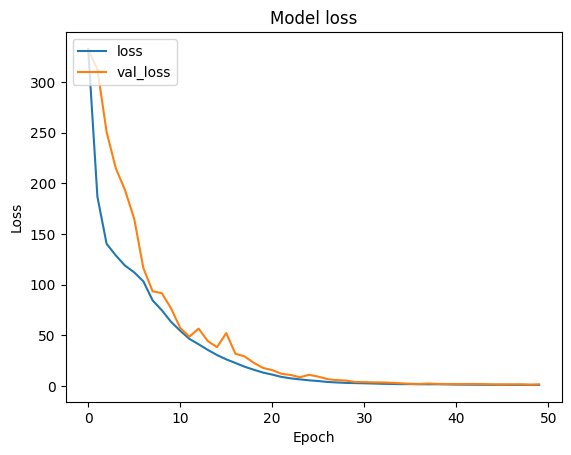

In [281]:
plot_history_loss(main_boxes_history)

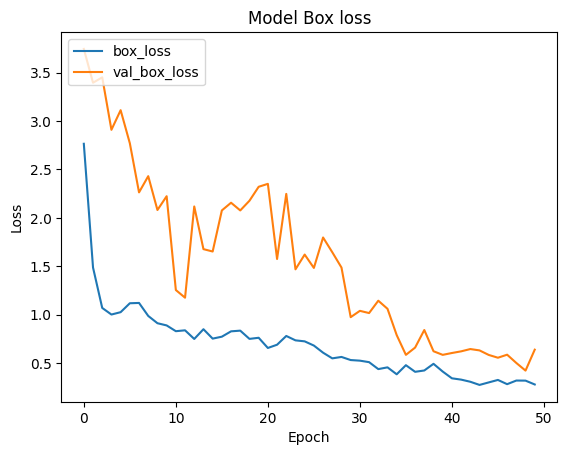

In [282]:
plot_history_loss_box(main_boxes_history)

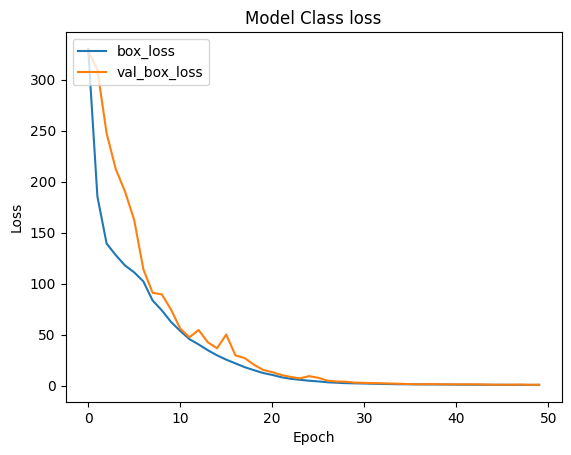

In [284]:
plot_history_loss_class(main_boxes_history)

1/1 [==============================] - 11s 11s/step
{'boxes': <tf.RaggedTensor [[[10.009567, 1080.1752, 438.39966, 1286.3771],
  [-14.039246, 945.8394, 443.0224, 1078.1417],
  [16.378357, 642.5309, 446.96796, 942.87524],
  [8.242828, 338.82233, 419.46155, 640.3871]]  ,
 [[72.0, 6.6840096, 529.0596, 104.0746],
  [47.99228, -221.62209, 684.66174, 495.93774],
  [-17.02008, 950.48193, 396.01218, 1083.8871],
  [1.7521057, 652.08655, 406.65903, 950.5817],
  [-0.8249054, 350.38922, 409.81573, 651.62164],
  [-12.927765, 1084.9531, 390.50195, 1285.5618],
  [-44.679535, -102.61801, 689.9204, 112.4073]] ]>, 'confidence': <tf.RaggedTensor [[0.71330595, 0.703407, 0.7028861, 0.5529959],
 [0.73104113, 0.7309465, 0.71765536, 0.6826491, 0.6767907, 0.63405645,
  0.5246902]                                                          ]>, 'classes': <tf.RaggedTensor [[3.0, 2.0, 1.0, 0.0], [0.0, 1.0, 2.0, 1.0, 0.0, 3.0, 0.0]]>, 'num_detections': array([4, 7])}


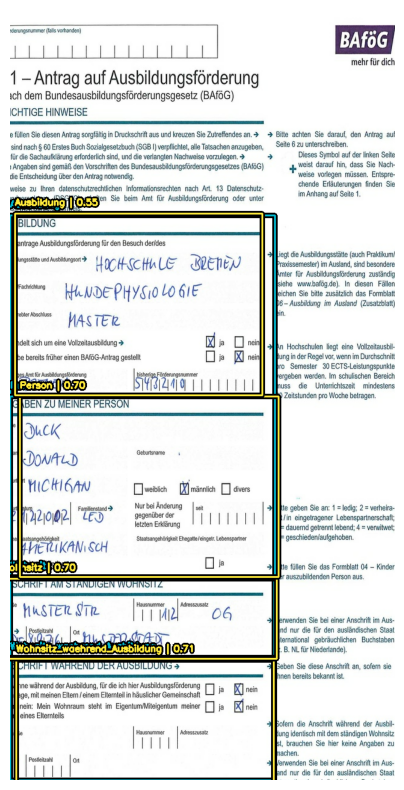

In [293]:
define_NonMaxSuppression(yolo_coco_main)
visualize_detections(yolo_coco_main, dataset=main_val_ds, bounding_box_format="xyxy", class_mapping=main_class_mapping)

In [294]:
yolo_coco_ausbildung= define_model(len(ausbildung_main_class_mapping))
compile_model(yolo_coco_ausbildung)

In [295]:
ausbildung_history = fit_model(yolo_coco_ausbildung, ausbildung_train_ds, ausbildung_val_ds, 50)

Epoch 1/50
7/7 [==============================] - 73s 4s/step - loss: 511.8695 - box_loss: 4.9713 - class_loss: 506.8982 - val_loss: 530.2267 - val_box_loss: 5.7934 - val_class_loss: 524.4332
Epoch 2/50
7/7 [==============================] - 16s 2s/step - loss: 285.6760 - box_loss: 3.2941 - class_loss: 282.3818 - val_loss: 561.0860 - val_box_loss: 5.9182 - val_class_loss: 555.1678
Epoch 3/50
7/7 [==============================] - 16s 2s/step - loss: 210.3227 - box_loss: 2.4168 - class_loss: 207.9060 - val_loss: 423.7892 - val_box_loss: 5.9238 - val_class_loss: 417.8655
Epoch 4/50
7/7 [==============================] - 17s 3s/step - loss: 173.6017 - box_loss: 2.1594 - class_loss: 171.4423 - val_loss: 355.3146 - val_box_loss: 5.4136 - val_class_loss: 349.9010
Epoch 5/50
7/7 [==============================] - 15s 2s/step - loss: 157.4280 - box_loss: 1.8499 - class_loss: 155.5782 - val_loss: 264.0436 - val_box_loss: 4.1336 - val_class_loss: 259.9100
Epoch 6/50
7/7 [========================

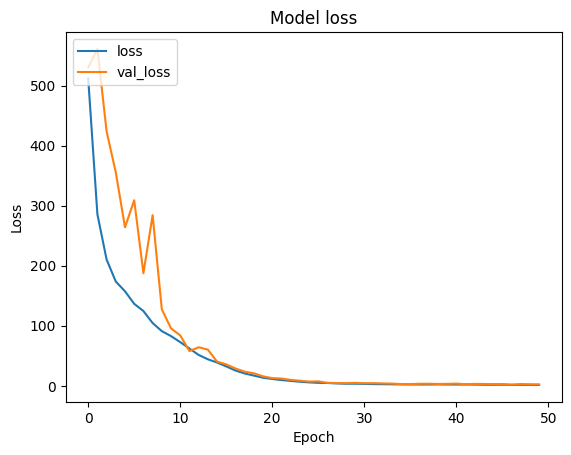

In [296]:
plot_history_loss(ausbildung_history)

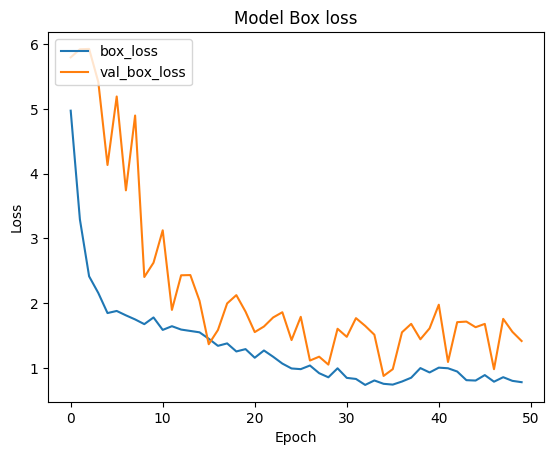

In [297]:
plot_history_loss_box(ausbildung_history)

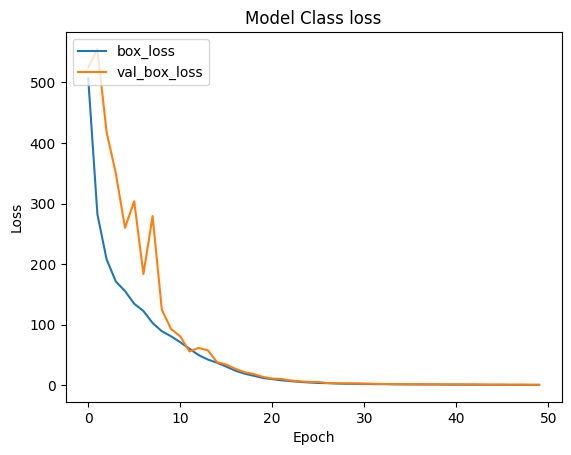

In [298]:
plot_history_loss_class(ausbildung_history)

1/1 [==============================] - 11s 11s/step
{'boxes': <tf.RaggedTensor [[[27.487625, 424.4846, 484.61502, 472.13348],
  [31.671417, 473.7476, 494.6728, 520.8191],
  [30.103607, 380.7275, 476.6375, 425.3204],
  [260.28577, 574.0423, 488.97034, 620.62115],
  [36.800766, 572.7387, 253.74738, 618.70776],
  [6.8378296, 747.7338, 438.35876, 793.77106]],
 [[220.47467, 619.4099, 450.2331, 665.85065],
  [13.651611, 619.08014, 231.85513, 664.5263],
  [302.84613, 726.32886, 750.6777, 772.9008]] ]>, 'confidence': <tf.RaggedTensor [[0.72923476, 0.7246207, 0.7066337, 0.5888696, 0.5849846, 0.5535291],
 [0.6273071, 0.570787, 0.55773747]]>, 'classes': <tf.RaggedTensor [[0.0, 5.0, 8.0, 4.0, 3.0, 5.0], [4.0, 3.0, 0.0]]>, 'num_detections': array([6, 3])}


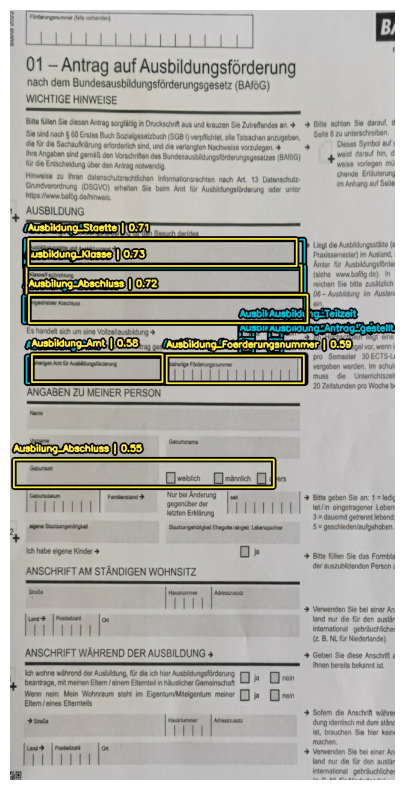

In [304]:
define_NonMaxSuppression(yolo_coco_ausbildung)
visualize_detections(yolo_coco_ausbildung, dataset=ausbildung_val_ds, bounding_box_format="xyxy", class_mapping=ausbildung_main_class_mapping)

In [300]:
def define_NonMaxSuppression(model):
    model.prediction_decoder = keras_cv.layers.NonMaxSuppression(
        bounding_box_format="xyxy",
        from_logits=True,
        iou_threshold=0.3,
        confidence_threshold=0.55

    )

In [305]:
yolo_coco_person= define_model(len(person_main_class_mapping))
compile_model(yolo_coco_person)

In [306]:
person_history = fit_model(yolo_coco_person, person_train_ds, person_val_ds, 50)

Epoch 1/50
7/7 [==============================] - 85s 4s/step - loss: 228.0107 - box_loss: 4.1802 - class_loss: 223.8305 - val_loss: 229.9857 - val_box_loss: 5.1419 - val_class_loss: 224.8438
Epoch 2/50
7/7 [==============================] - 19s 3s/step - loss: 125.9073 - box_loss: 2.5366 - class_loss: 123.3707 - val_loss: 185.9373 - val_box_loss: 4.8733 - val_class_loss: 181.0641
Epoch 3/50
7/7 [==============================] - 20s 3s/step - loss: 102.9071 - box_loss: 2.2009 - class_loss: 100.7062 - val_loss: 231.1228 - val_box_loss: 5.2052 - val_class_loss: 225.9175
Epoch 4/50
7/7 [==============================] - 18s 2s/step - loss: 87.3975 - box_loss: 1.9224 - class_loss: 85.4751 - val_loss: 151.9882 - val_box_loss: 5.3473 - val_class_loss: 146.6409
Epoch 5/50
7/7 [==============================] - 17s 2s/step - loss: 74.9896 - box_loss: 1.9328 - class_loss: 73.0568 - val_loss: 75.7828 - val_box_loss: 4.2967 - val_class_loss: 71.4861
Epoch 6/50
7/7 [==============================

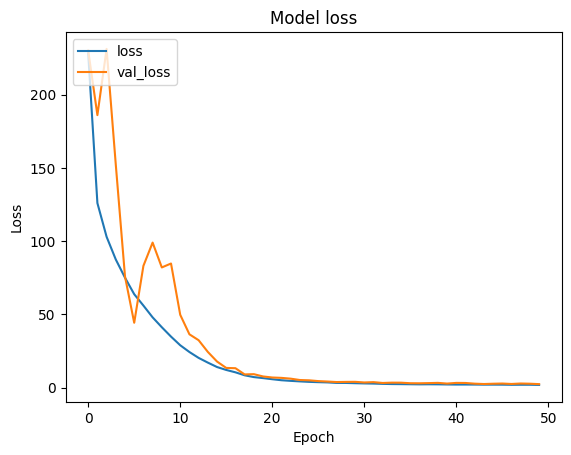

In [307]:
plot_history_loss(person_history)

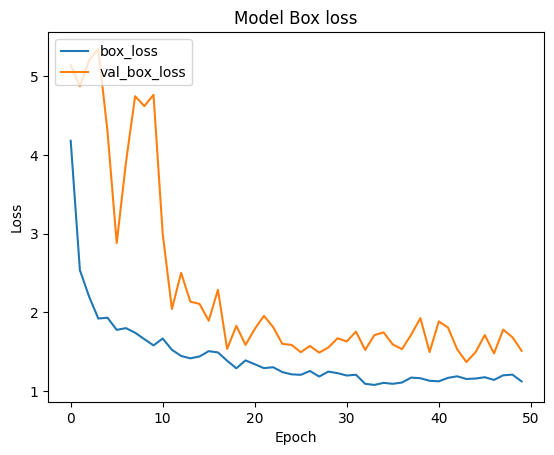

In [308]:
plot_history_loss_box(person_history)

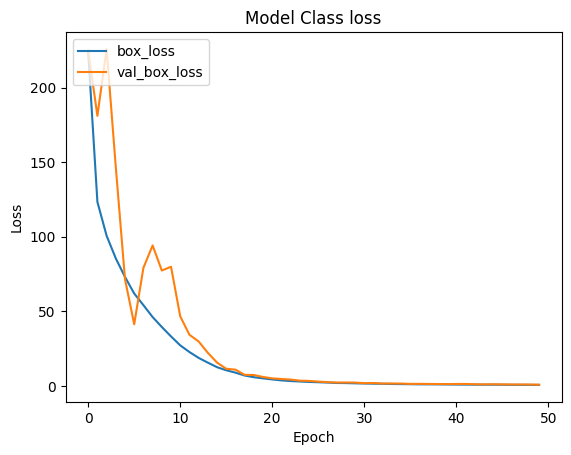

In [309]:
plot_history_loss_class(person_history)

1/1 [==============================] - 12s 12s/step
{'boxes': <tf.RaggedTensor [[[248.8668, 421.51355, 304.60837, 474.18002],
  [347.74896, 772.7254, 488.24008, 827.0332],
  [269.25952, 830.7506, 499.42255, 875.1896],
  [33.158817, 773.1255, 167.33963, 829.3965],
  [346.699, 747.4001, 366.49686, 772.1508],
  [148.09695, 632.8016, 379.97418, 680.43225],
  [237.69675, 688.7595, 467.1456, 731.56506],
  [-52.595856, 112.0, 240.21362, 694.4369],
  [387.08908, 870.9746, 408.32224, 896.1427],
  [267.03873, 748.9005, 289.9295, 773.9603],
  [411.6108, 747.77985, 434.21628, 770.93756],
  [144.9905, 529.7682, 367.2251, 574.06396]]  ,
 [[314.4098, 752.54443, 455.92023, 807.3901],
  [127.13475, 754.40845, 222.04993, 809.3155],
  [228.60901, 810.76404, 459.88858, 854.7112],
  [220.47722, 664.28143, 451.8811, 709.2052],
  [-5.130768, 749.647, 125.00926, 807.724],
  [-4.1674423, 706.4401, 215.81035, 752.9235],
  [-2.4295273, 661.125, 203.21754, 706.9613],
  [347.86676, 851.30975, 371.95062, 875.5167],

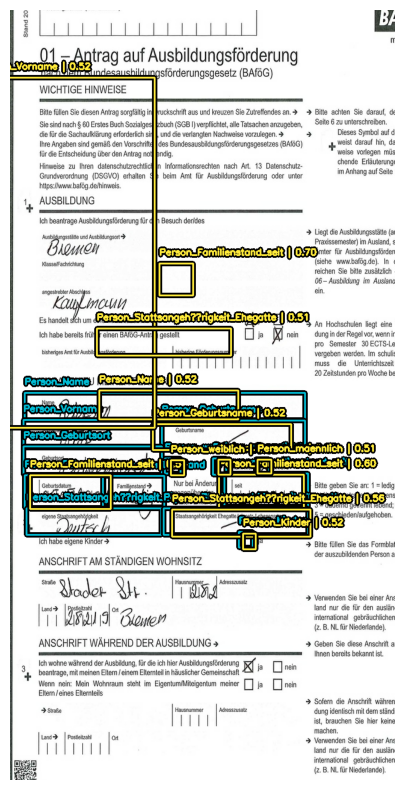

In [324]:
define_NonMaxSuppression(yolo_coco_person)
visualize_detections(yolo_coco_person, dataset=person_val_ds, bounding_box_format="xyxy", class_mapping=person_main_class_mapping)